In [1]:
"""Dependencies"""
# !pip install import-ipynb
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#access drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial

x_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/ohc3.csv"
y_path= "/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial/clean_data/depVar"

Mounted at /content/drive
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


In [2]:
%run Splitting_data.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial # Change path to yours'
/content/drive/MyDrive/GRAD-C24_Machine_Learning/MLProject_KenyaFinancial


In [3]:
X_train, X_val, y_train, y_val = training_set(x_path, y_path)

In [ ]:
for column in X_val.columns:
  print(X_val[column].dtype)

In [13]:
X_val["trx_date_f"]

260211    1.353024e+09
228583    1.361750e+09
441908    1.373846e+09
449153    1.372896e+09
95175     1.350864e+09
              ...     
610602    1.355443e+09
726866    1.368749e+09
669774    1.363651e+09
699832    1.355789e+09
362141    1.352419e+09
Name: trx_date_f, Length: 147170, dtype: float64

In [ ]:
#y_train.dtype

In [ ]:
#for column in X_train.columns:
  #if X_train[column].dtype == "object":
   # print(X_train.columns.get_loc(column))
  #else:
    #print("NO")

In [ ]:
y_train = y_train.fillna("")
X_train = X_train.fillna("")
y_val = y_val.fillna("")
X_val = X_val.fillna("")

In [ ]:
le=preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)

In [ ]:
for column in X_train.columns:
  if X_train[column].dtype == "object":
    X_train[column] = X_train[column].astype("|S")

In [ ]:
for column in X_val.columns:
  if X_val[column].dtype == "object":
    X_val[column] = X_val[column].astype("|S")

In [ ]:
for i in range(303, 440, 1):
  #print(X_train[column].dtype)
  X_train.iloc[:,i] = le.fit_transform(X_train.iloc[:,i])

In [ ]:
for i in range(303, 440, 1):
  #print(X_train[column].dtype)
  X_val.iloc[:,i] = le.fit_transform(X_val.iloc[:,i])

In [ ]:
#X_train = X_train.iloc[: , 1:]
#X_val = X_val.iloc[: , 1:]

Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
Y_pred = clf.predict(X_val)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_val, Y_pred))
print("F1:",metrics.f1_score(y_val, Y_pred, average="weighted"))
print("Matthew's Correlation Coefficient:", metrics.matthews_corrcoef(y_val, Y_pred))

Accuracy: 0.8564789019501257
F1: 0.7902660339583002
Matthew's Correlation Coefficient: 0.0


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, Y_pred)

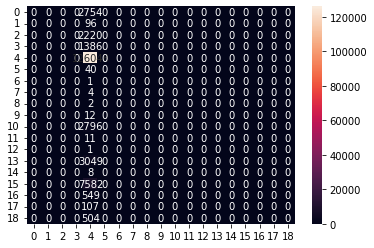

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)

In [ ]:
clf.decision_function(X_val)

array([[  8.57019561,   6.19435447,   8.38283055, ...,   5.21608516,
          7.46186748, -15.60440696],
       [  7.78778135,   5.65193522,   7.80241855, ...,   4.52123103,
          6.92111228, -14.27453896],
       [ 12.43455291,   9.35482531,  12.15767582, ...,   9.05287024,
         10.78122766, -23.85949649],
       ...,
       [ 19.73627173,  14.48534691,  18.96711897, ...,  13.75033914,
         16.80212824, -36.60923036],
       [ 20.48861819,  15.11025354,  19.72485775, ...,  14.34446871,
         17.51657913, -38.26876535],
       [ 11.33451353,   8.29966396,  11.07775764, ...,   7.30773944,
          9.84883467, -20.99072804]])

Logistic regression with l1 regularisation

In [ ]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(
    penalty="l1",
    random_state=0,
    solver = "saga"
)

In [ ]:
Y_pred = clf.predict(X_val)

NotFittedError: ignored

Evaluation

In [ ]:
Scores = {}
Scores[0] = {"Accuracy" : 0.8564789019501257, "F1" : 0.7902660339583002, "MCC" : 0.0}


In [ ]:
ScoresLOG = pd.DataFrame([[0, 0.8564789019501257, 0.7902660339583002, 0.0]], columns = ["C", "accuracy", "F1", "MCC"])

In [ ]:
ScoresLOG.to_csv("LogisticScores.csv", sep=";")

In [ ]:
ScoresLOG

,C,accuracy,F1,MCC
0,0,0.856479,0.790266,0.0


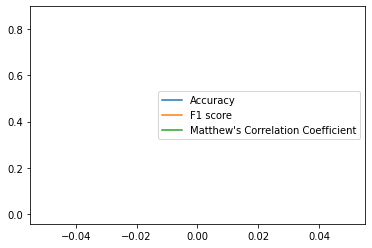

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ScoresLOG.C, ScoresLOG.accuracy, label = "Accuracy")
plt.plot(ScoresLOG.C, ScoresLOG.F1, label = "F1 score")
plt.plot(ScoresLOG.C, ScoresLOG.MCC, label = "Matthew's Correlation Coefficient")
plt.legend()
plt.show()

In [ ]:
ScoresLOG = ScoresLOG.set_index('C')

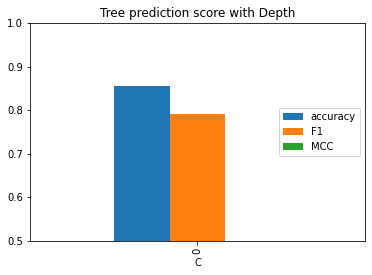

In [ ]:
ScoresLOG.plot.bar(ylim = (0.5, 1), title = 'Tree prediction score with Depth').legend(loc='center right')